## Project Title
### “Explore the data on movies and their box office performance to discover key trends and insights”

## Project Overview

##### This project aims to uncover actionable insights that will help guide a head of movie studio in producing profitable films.This aim will be realized through analyzing the performance of movies at the box office by exploring different factors such as genre, production budget, movie actor power, movie directors, movie ratings, and release timing. The goal is to uncover actionable insights that will help a new movie studio decide what types of films to produce, the ideal production budget, and the best time to release them in order to maximize box office success.

## Business Understanding

### (a) Key Stakeholders
#### The Key Stakeholders who have interest in this project include:
#### 1.0 Movie Studio Director(s): The head of the studio is the primary decision-maker, interested in maximizing profits by producing the right types of films with the right budget and release timing.

#### 2.0 Chief Finance Officer: They need data to understand how investments in film production will yield returns and help allocate budgets efficiently.

#### 3.0 Sales and Marketing Team: Interested in knowing the best genres, actors, and release timings that will attract the largest audience and generate buzz.

## Project Objectives

## Data Understanding

#### Source of Data

#### Description of Data

## Data Preparation and Data Cleansing

In [1]:
#Import the libraries
import zipfile
import os
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Step 1: Load the SQLite Database Using SQLite3

In [2]:
import sqlite3

# Connect to the SQLite database (replace 'database.db' with your DB filename)
conn = sqlite3.connect('im.db')
cursor = conn.cursor()

In [3]:
# Query the list of tables in the database
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(query, conn)

print(tables)

Empty DataFrame
Columns: [name]
Index: []


In [4]:
pd.read_sql('''SELECT * FROM movie_basics LIMIT 2''',conn)

DatabaseError: Execution failed on sql 'SELECT * FROM movie_basics LIMIT 2': no such table: movie_basics

In [5]:
# Export the DataFrame to CSV
Movie_basics_table_df  = pd.read_sql('''SELECT * FROM movie_basics LIMIT 2''',conn)


DatabaseError: Execution failed on sql 'SELECT * FROM movie_basics LIMIT 2': no such table: movie_basics

In [6]:
Movie_basics_table_df.to_csv('movie_basics.csv', index=False)



NameError: name 'Movie_basics_table_df' is not defined

In [7]:
Movie_basics_table_df.head()

NameError: name 'Movie_basics_table_df' is not defined

In [ ]:
Movie_basics_table_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         2 non-null      object 
 1   primary_title    2 non-null      object 
 2   original_title   2 non-null      object 
 3   start_year       2 non-null      int64  
 4   runtime_minutes  2 non-null      float64
 5   genres           2 non-null      object 
dtypes: float64(1), int64(1), object(4)
memory usage: 224.0+ bytes


In [8]:
# Let's load data from the movie_basics table
movie_query = "SELECT * FROM movie_basics LIMIT 5;"  # Adjust table name as needed
movie_df = pd.read_sql_query(movie_query, conn)

# Check the first few rows of the movie_basics data
print(movie_df.head())

DatabaseError: Execution failed on sql 'SELECT * FROM movie_basics LIMIT 5;': no such table: movie_basics

In [ ]:
# Let's load data from the movie akas
movie_akas_query = "SELECT * FROM movie_akas LIMIT 5;"  # Adjust table name as needed
movie_akas_df = pd.read_sql_query(movie_akas_query, conn)

# Check the first few rows of the movie_akas data
print(movie_akas_df.head())

    movie_id  ordering                                    title region  \
0  tt0369610        10                            Джурасик свят     BG   
1  tt0369610        11                        Jurashikku warudo     JP   
2  tt0369610        12  Jurassic World: O Mundo dos Dinossauros     BR   
3  tt0369610        13                  O Mundo dos Dinossauros     BR   
4  tt0369610        14                           Jurassic World     FR   

  language        types   attributes  is_original_title  
0       bg         None         None                0.0  
1     None  imdbDisplay         None                0.0  
2     None  imdbDisplay         None                0.0  
3     None         None  short title                0.0  
4     None  imdbDisplay         None                0.0  


### Step 2: Loan the Movie gross CSV file

In [18]:
Movie_grossdf= pd.read_csv('bom.movie_gross.csv')
Movie_grossdf.info()

FileNotFoundError: [Errno 2] No such file or directory: 'bom.movie_gross.csv'

In [ ]:
Movie_grossdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [ ]:
Movie_grossdf.info()
Movie_grossdf.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


(3387, 5)

In [ ]:
Movie_budget_df= pd.read_csv('tn.movie_budgets.csv')
Movie_budget_df.info()
Movie_budget_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


(5782, 6)

In [ ]:
Movie_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### Step 2: Data Cleaning


In [ ]:
# Checking the missing values Movie_gross income
Movie_grossdf.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [ ]:
# Clean the 'movie_grossdf' dataset as an example
# Drop rows with missing values in crucial columns
movie_grossdf = Movie_grossdf.dropna(subset=['studio', 'domestic_gross', 'foreign_gross'])

In [ ]:
movie_grossdf.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [ ]:
# Checking the missing values Movie_budget
Movie_budget_df.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

### Top_10_Studio performance by Domestic gross revenue

In [ ]:
# Group by Studio and sum the domestic gross income
Studio_performance = Movie_grossdf.groupby('studio')['domestic_gross'].sum().reset_index()

# Sort by domestic gross income in descending order
top_studio = Studio_performance.sort_values(by='domestic_gross', ascending=False)

# Display the top 10 studio
top_10_studio = top_studio.head(10)
print(top_10_studio)

      studio  domestic_gross
36        BV    1.841903e+10
238     Uni.    1.290239e+10
246       WB    1.216805e+10
93       Fox    1.094950e+10
215     Sony    8.459683e+09
185     Par.    7.685871e+09
134      LGF    4.118963e+09
247  WB (NL)    3.995700e+09
133     LG/S    2.078200e+09
171     P/DW    1.682900e+09


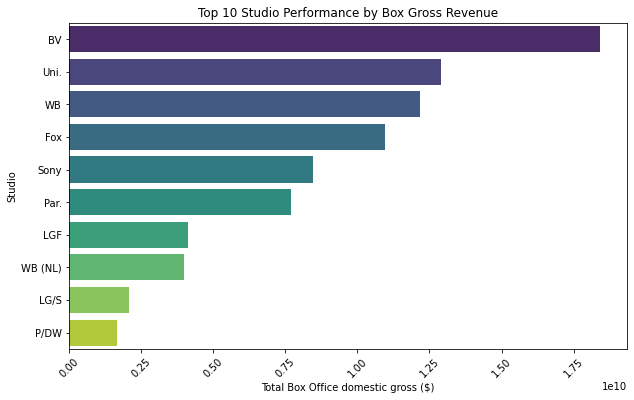

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='domestic_gross', y='studio', data=top_10_studio, palette='viridis')
plt.title('Top 10 Studio Performance by Box Gross Revenue')
plt.xlabel('Total Box Office domestic gross ($)')
plt.ylabel('Studio')
plt.xticks(rotation=45)
plt.show()

### Top_10_movie performance by production budget

In [ ]:
# Group by movie and sum the production budget
Movie_performance = Movie_budget_df.groupby('movie')['production_budget'].sum().reset_index()

# Sort by gross income in descending order
top_movie = Movie_performance.sort_values(by='production_budget', ascending=False)

# Display the top 10 movie
top_10_movie = top_movie.head(10)
print(top_10_movie)

                                  movie production_budget
4649  The LEGO Movie 2: The Second Part       $99,000,000
4864                  The Peanuts Movie       $99,000,000
342                  And Then Came Love          $989,000
4797                  The Mummy Returns       $98,000,000
246                     Alien: Covenant       $97,000,000
1680                  Gangs of New York       $97,000,000
414                     Ask Me Anything          $950,000
867                              Charly          $950,000
1871                         Hard Candy          $950,000
2262                              Jesse          $950,000


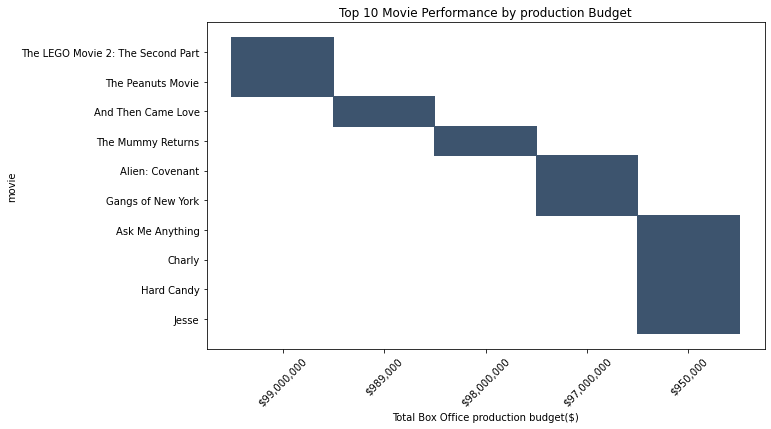

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(x='production_budget', y='movie', data=top_10_movie, palette='viridis')
plt.title('Top 10 Movie Performance by production Budget')
plt.xlabel('Total Box Office production budget($)')
plt.ylabel('movie')
plt.xticks(rotation=45)
plt.show()

### The correlation between production_budget and gross income

In [ ]:
# Calculate the correlation between budget and gross income
correlation = Movie_budget_df[['production_budget', 'domestic_gross']].corr()
print(correlation)

Empty DataFrame
Columns: []
Index: []


In [17]:
# Scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x='production_budget', y='worldwide_gross', data=Movie_budget_df)
plt.title('Production_Budget vs Box Office Gross Income')
plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Gross Income ($)')
plt.show()

NameError: name 'Movie_budget_df' is not defined

<Figure size 576x432 with 0 Axes>

### Identify the most effective months, seasons, or specific holidays for movie releases

In [ ]:
# Group by month and sum the gross income
#month_performance = Movie_budget_df.groupby('month')['gross_income'].sum().reset_index()

### Top_10_Genre performance by Domestic gross revenue

In [38]:
working_data_file = pd.read_csv('working_data_file.csv')
working_data_file.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_revenue,net_revenue,ROI,genres,averagerating,runtime_minutes
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904,732.200683,Horror,6.1,93.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750,213.377435,"Action,Adventure,Fantasy",6.6,136.0
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700,-157475300,-44.992943,"Action,Adventure,Sci-Fi",6.0,113.0


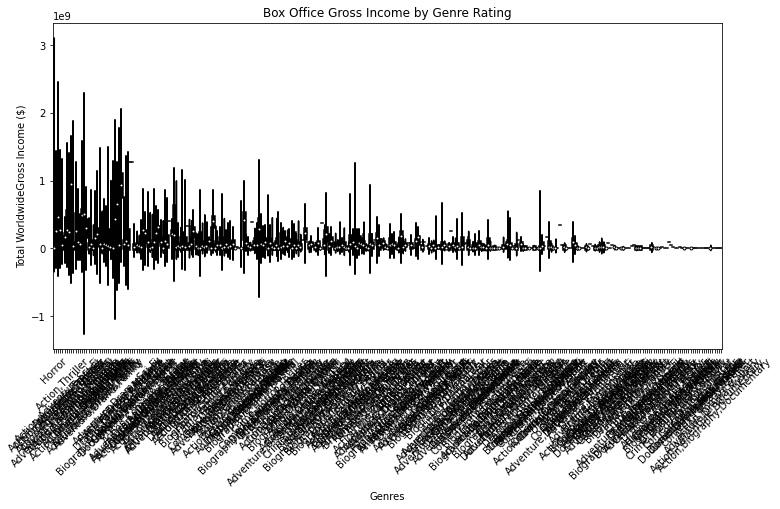

In [41]:
# Group by genre and calculate average rating and total gross income
genre_rating_performance = working_data_file.groupby('genres').agg(
    average_rating=('averagerating', 'mean'),
    total_gross_income=('worldwide_gross', 'sum')
).reset_index()

# Visualize the relationship between genre rating and box office performance using a violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='genres', y='worldwide_gross', data=working_data_file, palette='magma')
plt.title('Box Office Gross Income by Genre Rating')
plt.xlabel('Genres')
plt.ylabel('Total WorldwideGross Income ($)')
plt.xticks(rotation=45)
plt.show()

In [20]:
# Group by genre and sum the total revenue
genre_performance = working_data_file.groupby('genres')['total_revenue'].sum().reset_index()

# Sort by gross income in descending order
top_genres = genre_performance.sort_values(by='total_revenue', ascending=False)

# Display the top 10 genres
top_10_genres = top_genres.head(10)
print(top_10_genres)

                         genres  total_revenue
13      Action,Adventure,Sci-Fi    47528311587
74   Adventure,Animation,Comedy    37203117830
9      Action,Adventure,Fantasy    18396089623
225                       Drama    18279012330
4       Action,Adventure,Comedy    12979598177
2    Action,Adventure,Animation    10100208440
211                 Documentary     9865660292
147                      Comedy     9528040239
284                      Horror     8833376891
106    Adventure,Family,Fantasy     7884969190


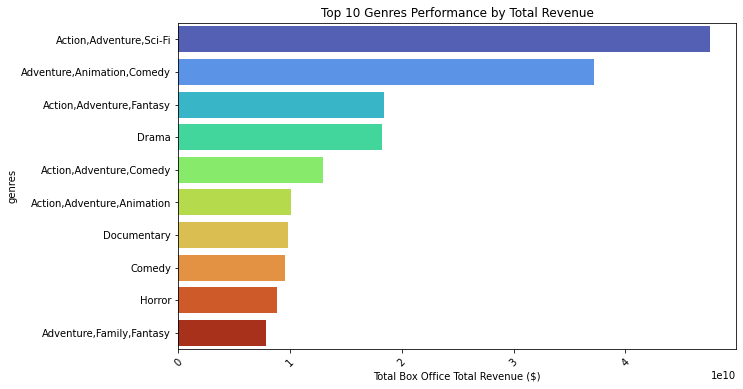

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x='total_revenue', y='genres', data=top_10_genres, palette='turbo')
plt.title('Top 10 Genres Performance by Total Revenue')
plt.xlabel('Total Box Office Total Revenue ($)')
plt.ylabel('genres')
plt.xticks(rotation=45)
plt.show()

### The correlation between production_budget and gross incom

                   production_budget  total_revenue
production_budget           1.000000       0.774998
total_revenue               0.774998       1.000000


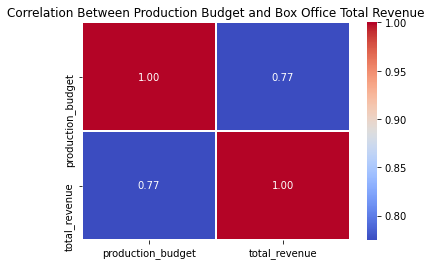

In [53]:
# Calculate the correlation matrix
correlation = working_data_file[['production_budget', 'total_revenue']].corr()

# Calculate correlation between production budget and box office revenue
correlation = working_data_file[['production_budget', 'total_revenue']].corr()
print(correlation)

# Visualize the correlation using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Production Budget and Box Office Total Revenue')
plt.show()

In [22]:
# Calculate the correlation between budget and gross income
correlation = working_data_file[['genres', 'averagerating']].corr()
print(correlation)

               averagerating
averagerating            1.0


## To analyze how the production budget size of a film correlates with its box office revenue

### Categorize Films Based on Budget Size

Lets categorize the production_budget into three groups:

Low: Budget below 100 Million Dollars ;
Medium: Budget between 100 Million and 350 Million Dollars; and 
High: Budget above 350 Million Dollars

In [43]:
# Define budget categories
def categorize_budget(row):
    if row['production_budget'] < 350000000:
        return 'Low Budget'
    elif row['production_budget'] <= 100000000:
        return 'Medium Budget'
    else:
        return 'High Budget'

working_data_file['budget_category'] = working_data_file.apply(categorize_budget, axis=1)

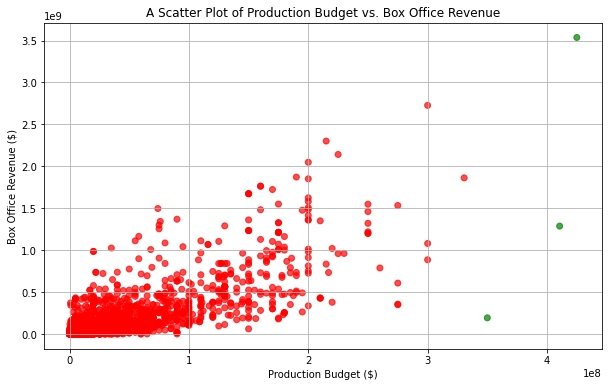

In [46]:
# Visualize the data using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(working_data_file['production_budget'], working_data_file['total_revenue'], c=working_data_file['budget_category'].map({'Low Budget': 'red', 'Medium Budget': 'blue', 'High Budget': 'green'}), alpha=0.7)
plt.title('A Scatter Plot of Production Budget vs. Box Office Revenue')
plt.xlabel('Production Budget ($)')
plt.ylabel('Box Office Revenue ($)')
plt.grid(True)
plt.show()


In [ ]:
# Visualize the data using a heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(working_data_file['production_budget'], working_data_file['total_revenue'], c=working_data_file['budget_category'].map({'Low Budget': 'red', 'Medium Budget': 'blue', 'High Budget': 'green'}), alpha=0.7)
plt.title('Production Budget vs. Box Office Revenue')

<Figure size 1440x432 with 0 Axes>

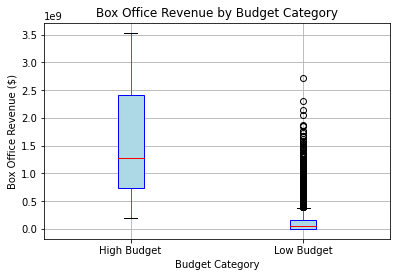

In [ ]:
# Box plot for box office revenue based on budget category
plt.figure(figsize=(20, 6))
working_data_file.boxplot(column='total_revenue', by='budget_category', patch_artist=True, 
           boxprops=dict(facecolor='lightblue', color='blue'), medianprops=dict(color='red'))
plt.title('Box Office Revenue by Budget Category')
plt.suptitle('')
plt.xlabel('Budget Category')
plt.ylabel('Box Office Revenue ($)')
plt.show()

## Findings
After plotting and analyzing the correlation between production budget and box office revenue, here are some potential insights that the Head of Movie Studio in making decisions on how to invest the production budget:

Correlation Insights:

There is a strong positive correlation OF (0.77498) between production_budget and total_revenue, this suggests that higher production budgets tend to result in higher movie box office revenue, as depicted by the heatmap visualization diagram.


### Actionable Insights and Recommendations to the Movie Studio Manager
#### Production Budget Categories:

Low Budget Films: 
- These films may have a limited marketing budget and smaller production teams, but their return on investment (ROI) can be high if they are successful. Filmmakers may focus on niche genres or creative storytelling to stand out with low budgets.

Medium Budget Films: 
- These films are more likely to have broader marketing campaigns and larger star power. They may be positioned to cater to a wider audience and have decent returns, but also face higher risks due to the larger investments.

High Budget Films: 
- These films often come with significant risks, especially if the film does not perform well at the box office. The production company needs to consider both domestic and international revenue streams and possibly focus on large franchises or blockbuster films to justify the high costs.

#### Choice of Investment Strategy based on film production budget size:

For Low Budget Films: 
- Invest in projects that have high creative potential with a unique angle, potentially using established talent or indie filmmakers with a proven track record. Emphasize viral marketing and social media to reduce marketing costs.

For Medium Budget Films: 
- Look for films that balance creative potential and commercial viability. These films can benefit from traditional marketing strategies and may have good returns if marketed properly to the right demographic.

For High Budget Films: 
- Focus on large-scale productions, possibly franchises or sequels with a proven fanbase. These films should focus on strong global marketing and distribution strategies to mitigate risks and ensure profitability.

## Relationship between film genre rating and box office performance

In [24]:
# Group by genre and calculate average rating and total gross income
genre_rating_performance = working_data_file.groupby('genres').agg(averagerating=('averagerating', 'mean'),total_gross_income=('total_revenue', 'sum')).reset_index()